In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interactive as jupyter_interactive


%matplotlib notebook




In [2]:
def interactive_wave_plot(k):
    '''
    :param k: wave number
    '''
    global current_k
    current_k= k
    # Define the position of the original lattice
    x = np.linspace(0,6,7)
    y = np.linspace(-3,3,7)
    x_origine,y_origine = np.meshgrid(x,y)
    
    # Define the position of the displaced lattice
    x_p = x + np.sin(k*x)
    x_long,y_long = np.meshgrid(x_p,y)
    
    y_p = y + np.sin(k*(x-np.mean(x)))
    x_trans=x_origine
    y_trans = y_origine+np.sin(k*x)
    # plot 

    fig,axs=plt.subplots(1,2,figsize=(10,5))


    axs[0].plot(x_origine,y_origine,'ko', mfc='none')
    axs[0].plot(x_trans,y_trans,'ko')
    axs[0].axis([-1,7,-4.5,4.5])
    axs[0].title.set_text('Transverse')
    axs[1].plot(x_origine,y_origine,'ko',mfc='none')
    axs[1].axis('equal')
    axs[1].plot(x_long,y_long,'ko')
    axs[1].axis([-1,7,-4.5,4.5])
    axs[1].title.set_text("Longitudinal")
    for i in np.arange(2):
        axs[i].set_xticks([])
        axs[i].set_yticks([])
    plt.show()


In [3]:
i_p=jupyter_interactive(interactive_wave_plot,k=(-1,1,0.01))
i_p

interactive(children=(FloatSlider(value=0.0, description='k', max=1.0, min=-1.0, step=0.01), Output()), _dom_c…

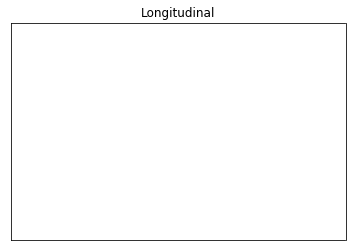

In [4]:
from matplotlib import animation

from ipywidgets import interact,interactive
import ipywidgets as widgets

from IPython.display import HTML



fig_long = plt.figure()
ax = plt.axes()
ax.set_xlim((-1.5,7.5))
ax.set_ylim((-5,5))
line_or, = ax.plot([], [], 'ko',mfc=None)
line_mov, = ax.plot([], [], 'ko')
plt.title("Longitudinal")
ax.set_xticks([])
ax.set_yticks([])
# Initialization function: plot the background of each frame
def init_long():
    line_or.set_data([], [])
    line_mov.set_data([], [])

    return line_or,

# Animation function which updates figure data.  This is called sequentially
def animate_long(iteration):
    global current_k
    k=current_k
    omega=3
    t=omega*2*(1/100)/np.pi*iteration
    
    
    x = np.linspace(0,6,7)
    y = np.linspace(-3,3,7)
    
    x_origine,y_origine = np.meshgrid(x,y)
    
    # Define the position of the displaced lattice
    x_p = x + np.sin(k*x-omega*t)
    x_long,y_long = np.meshgrid(x_p,y)
    
    x_trans=x_origine
    y_trans = y_origine+np.sin(k*x-omega*t)
    line_mov.set_data(np.asarray([x_long,y_long]))
    return line_mov,

# Call the animator.  blit=True means only re-draw the parts that have changed.

anim_long = animation.FuncAnimation(fig_long, animate_long, init_func=init_long,frames=112, interval=25, blit=True)



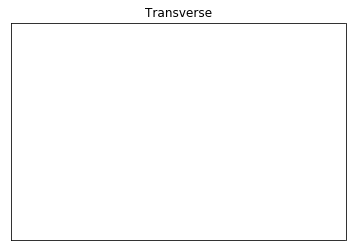

In [5]:
fig_trans = plt.figure()
ax_trans = plt.axes()
ax_trans.set_xlim((-1.5,7.5))
ax_trans.set_ylim((-5,5))
line_or, = ax_trans.plot([], [], 'ko',mfc=None)
line_mov, = ax_trans.plot([], [], 'ko')
plt.title("Transverse")
ax_trans.set_xticks([])
ax_trans.set_yticks([])
# Initialization function: plot the background of each frame
def init():
    line_or.set_data([], [])
    line_mov.set_data([], [])

    return line_or,

# Animation function which updates figure data.  This is called sequentially
def animate(iteration):
    global current_k
    k=current_k
    omega=3
    t=omega*2*(1/100)/np.pi*iteration

    
    x = np.linspace(0,6,7)
    y = np.linspace(-3,3,7)
    
    x_origine,y_origine = np.meshgrid(x,y)
    
    x_trans=x_origine
    y_trans = y_origine+np.sin(k*x-omega*t)
    line_mov.set_data(np.asarray([x_trans,y_trans]))
    return line_mov,

# Call the animator.  blit=True means only re-draw the parts that have changed.

anim = animation.FuncAnimation(fig_trans, animate, init_func=init,frames=112, interval=25, blit=True)